<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0705/08_1_basic_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic_Preprocessing

## Download sample data

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

In [ ]:
!gdown 1op55Vwx7quF0UoNbJ18GmSx_CoCjILaN

Downloading...
From: https://drive.google.com/uc?id=1op55Vwx7quF0UoNbJ18GmSx_CoCjILaN
To: /content/imgset_mini.zip
100% 83.2k/83.2k [00:00<00:00, 44.4MB/s]


In [ ]:
!unzip imgset_mini.zip

Archive:  imgset_mini.zip
  inflating: airplane.jpg            
  inflating: car.jpg                 
  inflating: dog.jpg                 


In [ ]:
img_path = '/content/airplane.jpg'

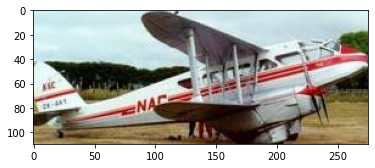

In [ ]:
img = cv2.imread(img_path)

# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# COLOR_BGR2RGB로 해야 원본 그대로 보여지는데 imshow으로 시각화 할 때 BGR이 기본 설정이라 파란색으로 보여지게 됩니다
# 저장은 원본 그대로 저장됩니다

## Resize

In [ ]:
img = cv2.imread(img_path)
img.shape

(110, 275, 3)

(90, 224, 3)

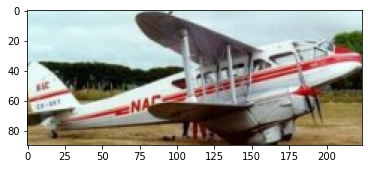

In [ ]:
# 이미지의 width와 height 중 긴 쪽을 img_size에 맞추기
img_size = 224

# img.shape[0] : 행의 개수 = 세로
# img.shape[1] : 열의 개수 = 가
if(img.shape[1] > img.shape[0]) :
    ratio = img_size/img.shape[1]
else :
    ratio = img_size/img.shape[0]

img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img.shape

cv2.resize
- dsize : dsize에 원하는 사이즈를 입력하거나,
- fx, fy : dsize에 (0,0)주고, fx, fy에 비율을 입력하면 원하는 사이즈로 resize할 수 있다.
- interpolation : 크기를 변경할 때 어떤 보간법을 쓸지 정할 수 있다.
    1. cv2.INTER_NEAREST - 최근방 이웃 보간법 : 가장 빠르지만 퀄리티가 많이 떨어져 잘 쓰이지 않습니다.

    2. cv2.INTER_LINEAR - 양선형 보간법(2x2 이웃 픽셀 참조) : 속도도 빠르고 퀄리티도 적당하다.

    3. cv2.INTER_CUBIC - 3차회선 보간법(4x4 이웃 픽셀 참조) : cv2.INTER_LINEAR 보다 느리지만 퀄리티는 더 좋다.

    4. cv2.INTER_LANCZOS4 - Lanczos 보간법 (8x8 이웃 픽셀 참조) : 좀더 복잡해서 오래 걸리지만 퀄리티는 좋다.

    5. cv2.INTER_AREA - 영상 축소시 효과적 : 영역적인 정보를 추출해서 결과 영상을 셋팅

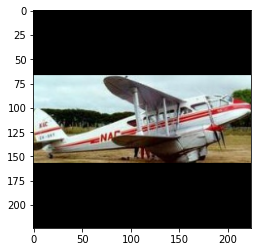

In [ ]:
# 그림 주변에 검은색으로 칠하기
w, h = img.shape[1], img.shape[0]

dw = (img_size-w)/2 # img_size와 w의 차이
dh = (img_size-h)/2 # img_size와 h의 차이

M = np.float32([[1,0,dw], [0,1,dh]])
# (2*3 이차원 행렬), warpAffine에 넣을 비율
# [ 1, 0 , dw] : dw를 1(행의 개수= 세로)에 적용, [ 0, 1, dh] : 1(열의 개수 = 가로)에 dh를 넣는다
img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환
# 224, 224에 비율을 제외한 나머지는 0으로 채운다 = 검은색 패딩

cv2.imwrite('resized_img.jpg' , img_re)

plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))

In [ ]:
os.mkdir('resized')

In [ ]:
images = []

for filename in ['airplane', 'car', 'dog']:
    img_path = '/content/'+filename+'.jpg'
    print(img_path)
    img = cv2.imread(img_path)
    img_size = 224

    if(img.shape[1] > img.shape[0]) :
        ratio = img_size/img.shape[1]
    else :
        ratio = img_size/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

    # 그림 주변에 검은색으로 칠하기
    w, h = img.shape[1], img.shape[0]

    dw = (img_size-w)/2 # img_size와 w의 차이
    dh = (img_size-h)/2 # img_size와 h의 차이

    M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환

    cv2.imwrite('resized/{}.jpg'.format(filename) , img_re)
    images.append(img_re)

/content/airplane.jpg
/content/car.jpg
/content/dog.jpg


In [ ]:
images

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), array([[[ 20,  26,  25],
         [ 20,  26,  25],
         [ 21,  27,  26],
         ...,
         [203, 212, 215],
         [203, 212, 215],
       

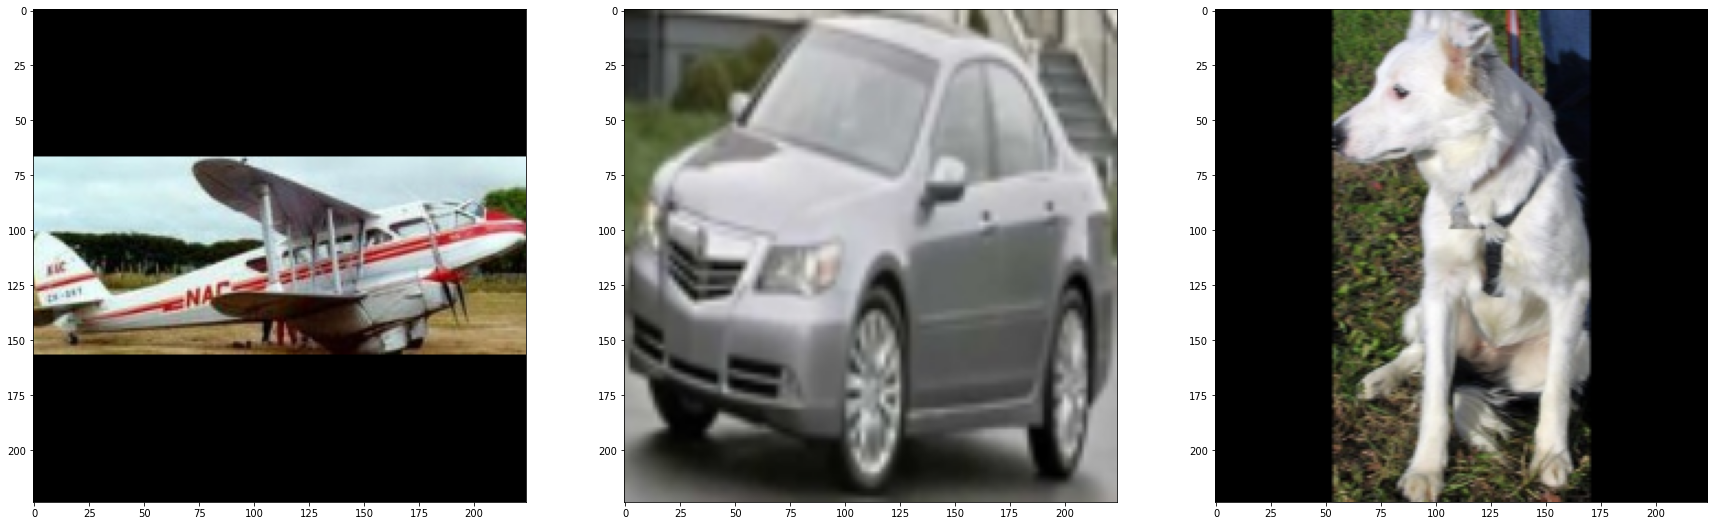

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(images):
    plt.subplot(1,3,idx+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Zero Centering

In [ ]:
# zero-centering : 이미지를 합쳐서 합친 이미지의 평균을 최대한 0로 만드는 것
compute_mean = lambda imgs : np.mean(imgs, axis=0)
# 입력들어오는 차원의 몇번째가 없어져야 하는지 생각하자
# axis = 몇번째
# 3장 이미지인 경우 shape = 3(데이터 개수), 224, 224, 3 >> 1, 224, 224, 3 으로 만들고 싶을 때 첫번째 3이 없어져야 하니까 axis = 0 (번째)'
# 참고 axis = -1은 axis의 마지막 번째 = 마지막 차원

In [ ]:
# zero_centering을 위해 합친 이미지의 평균을 만든다 (컬러인 경우 색상은 색상끼리 합친다 (ex :R은 R끼리))
mean_img = compute_mean(images)

In [ ]:
mean_img.shape

(224, 224, 3)

In [ ]:
zero_centered_images = images - mean_img

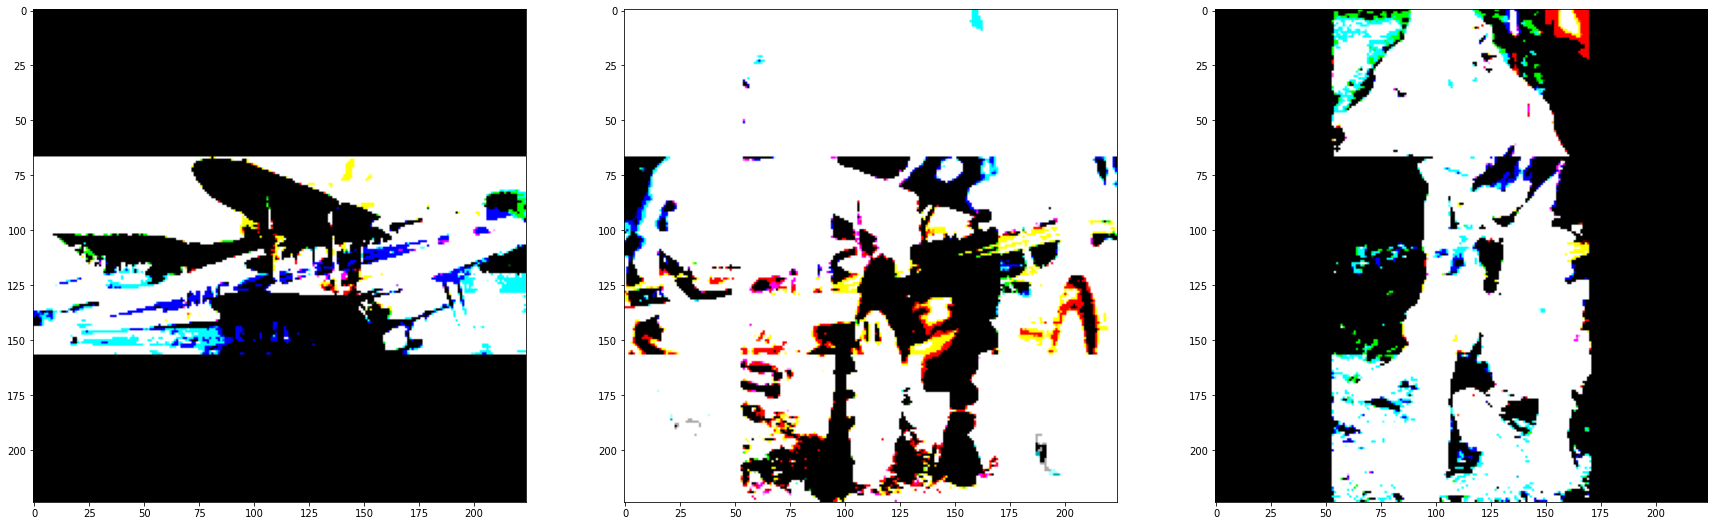

In [ ]:
plt.figure(figsize=(15,5))

for idx, zc_img in enumerate(zero_centered_images):
    plt.subplot(1,3,idx+1)
    plt.imshow(zc_img)

# 라벨과 라벨 간의 패턴 차이는 별로 달라지지 않는다, 같은 mean 값을 빼준거라 크게 변화가 없다
# 하지만 zero_centering은 평균값을 맞춰줘서 값의 안정화를 준 것이라 과적합의 우려가 적어진다

## Grayscaling & Binarization

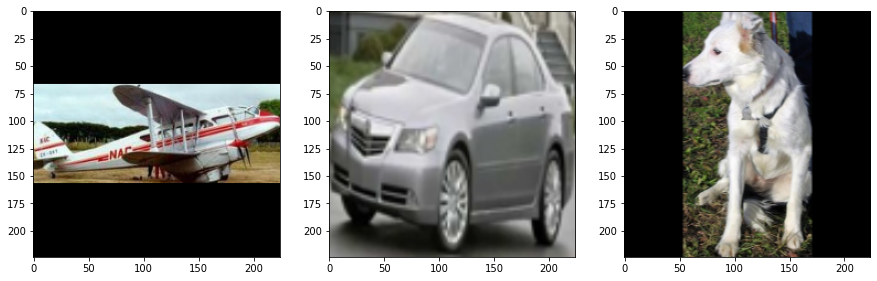

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(images):
    plt.subplot(1,3,idx+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# COLOR_BGR2GRAY : gray scale로 변환
grayscale = lambda img : cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_imgs = [grayscale(img) for img in images]
gray_imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 25,  25,  26, ..., 212, 212, 212],
        [ 27,  27,  28, ..., 209, 213, 215],
        [ 32,  32,  32, ..., 200, 216, 222],
        ...,
        [147, 146, 144, ..., 163, 165, 166],
        [148, 148, 146, ..., 162, 164, 165],
        [149, 148, 146, ..., 162, 164, 165]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [ ]:
gray_imgs[0].shape

(224, 224)

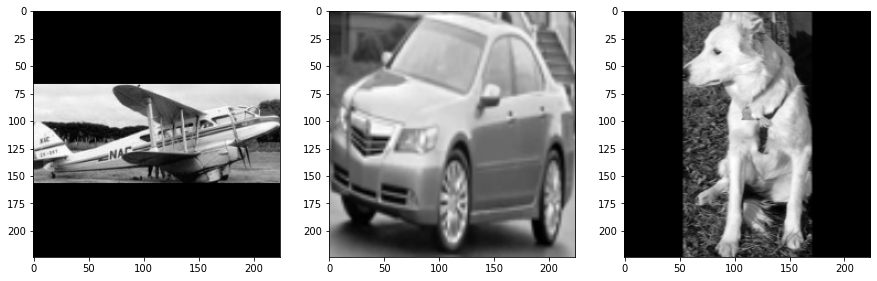

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(gray_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')

In [ ]:
thresh = 127
binarization = lambda img : cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
# threshold : thresh를 넘기면 255로 바꿔라

In [ ]:
bin_imgs = [binarization(img)[1] for img in gray_imgs]
bin_imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

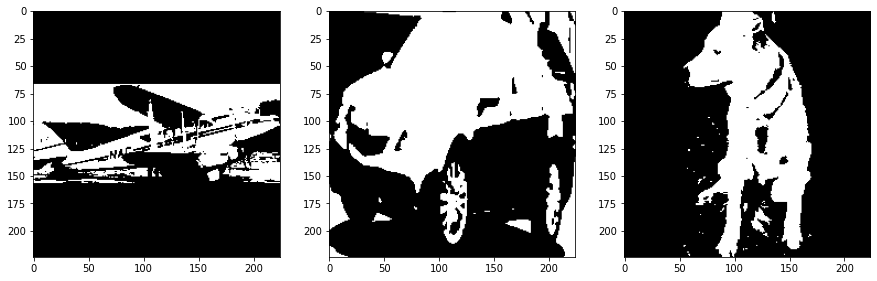

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(bin_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')